In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.time import Time
from datetime import datetime

In [187]:
#data.csv読み込み
df = pd.read_csv("/Users/air-tsuboi18/sugai/xrism/HR1099/HR1099.csv")

In [188]:
df1 = pd.DataFrame()

# "Band" 列が "V" の行だけを取り出して新しいデータフレーム df1 に格納
df1 = df[df["Band"] == "V"]
df1

# 文字列をdatetimeオブジェクトに変換してデータフレームに上書き
df1["Obs date (UT)"] = pd.to_datetime(df1["Obs date (UT)"], format="%Y/%m/%d %H:%M")

# 新しいフォーマットに変換して表示
df1["Obs date (UT)"] = df1["Obs date (UT)"].dt.strftime("%Y/%m/%d %H:%M")

#isoに変換
df1["Obs date (UT)"] = df1["Obs date (UT)"].str.replace('/', '-')
df1["Obs date (UT)"] = df1["Obs date (UT)"].str.replace(' ', 'T')

/var/folders/cg/82gst38j3f573_wr55vjw8fm0000gn/T/ipykernel_33246/3784167105.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Obs date (UT)"] = pd.to_datetime(df1["Obs date (UT)"], format="%Y/%m/%d %H:%M")
/var/folders/cg/82gst38j3f573_wr55vjw8fm0000gn/T/ipykernel_33246/3784167105.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Obs date (UT)"] = df1["Obs date (UT)"].dt.strftime("%Y/%m/%d %H:%M")
/var/folders/cg/82gst38j3f573_wr55vjw8fm0000gn/T/ipykernel_33246/3784167105.py:14: SettingWithCo

In [189]:

#期間を指定
#yyyy-mm-ddThh:mm (例：2024-01-01T05:02)

start_date = "2020-01-10T00:00"
end_date = "2023-05-09T02:00"

df1 = df1[(df1["Obs date (UT)"] >= start_date) & (df1["Obs date (UT)"] <= end_date)]
df1

,Object,Obs date (UT),Mag.,Error,Band,OID
14,033647+0035.2,2020-01-10T10:58,5.810,0.004,V,6415676302
15,033647+0035.2,2020-01-10T10:59,5.842,0.005,V,6415681357
16,033647+0035.2,2020-01-10T10:59,5.893,0.005,V,6415688284
18,033647+0035.2,2020-01-10T11:00,5.868,0.005,V,6415693179
20,033647+0035.2,2020-01-11T10:57,5.826,0.011,V,6418681219
...,...,...,...,...,...,...
783,033647+0035.2,2023-01-10T11:07,5.885,0.008,V,8503056719
784,033647+0035.3,2023-01-11T11:00,5.817,0.006,V,8508581837
786,033647+0035.3,2023-01-11T11:01,5.857,0.006,V,8508587210
788,033647+0035.2,2023-01-11T11:02,5.885,0.006,V,8508594603


In [190]:
df2 = pd.DataFrame()

df2 = df1[["Obs date (UT)", "Mag.", "Error"]]

# ISO形式の日付をMJDに変換する関数
def iso_to_mjd(date_str):
    time = Time(date_str, format='isot', scale='utc')
    return time.mjd

# 'Obs date (UT)'列をISO形式からMJDに変換して上書き
df2['Obs date (UT)'] = df1['Obs date (UT)'].apply(iso_to_mjd)

#MJDに名前を変える
df2 = df2.rename(columns={"Obs date (UT)": "MJD"})

df2

/var/folders/cg/82gst38j3f573_wr55vjw8fm0000gn/T/ipykernel_33246/2352304812.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Obs date (UT)'] = df1['Obs date (UT)'].apply(iso_to_mjd)


,MJD,Mag.,Error
14,58858.456944,5.810,0.004
15,58858.457639,5.842,0.005
16,58858.457639,5.893,0.005
18,58858.458333,5.868,0.005
20,58859.456250,5.826,0.011
...,...,...,...
783,59954.463194,5.885,0.008
784,59955.458333,5.817,0.006
786,59955.459028,5.857,0.006
788,59955.459722,5.885,0.006


In [191]:
df3 = pd.DataFrame()

df3 = df2[["MJD", "Mag.","Error"]]

In [192]:
#HR1099基準日：JD=42763.452+2400000.5 MJD=42763.452
#HR1099周期：2.83774

df3["relative_MJD"] = df3["MJD"] - 42763.452

df3["phase"] = (df3["relative_MJD"] % 2.83774)/2.83774

df3


,MJD,Mag.,Error,relative_MJD,phase
14,58858.456944,5.810,0.004,16095.004944,0.768712
15,58858.457639,5.842,0.005,16095.005639,0.768957
16,58858.457639,5.893,0.005,16095.005639,0.768957
18,58858.458333,5.868,0.005,16095.006333,0.769201
20,58859.456250,5.826,0.011,16096.004250,0.120860
...,...,...,...,...,...
783,59954.463194,5.885,0.008,17191.011194,0.993754
784,59955.458333,5.817,0.006,17192.006333,0.344434
786,59955.459028,5.857,0.006,17192.007028,0.344678
788,59955.459722,5.885,0.006,17192.007722,0.344923


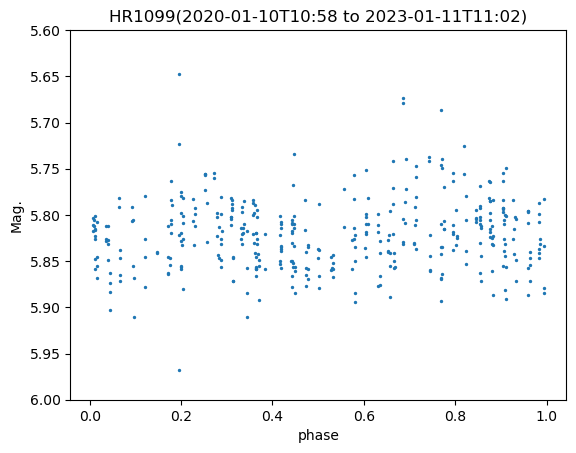

In [198]:
#plot

# "r"を横軸、"Mag."を縦軸としてプロット
plt.scatter(df3["phase"], df3["Mag."], s = 2)

# 軸ラベルとタイトルを設定
plt.ylim(6, 5.6)
plt.xlabel("phase")
plt.ylabel("Mag.")


# df2の一番上と一番下の日付を取得
start_date = df1["Obs date (UT)"].iloc[0]
end_date = df1["Obs date (UT)"].iloc[-1]


# その他のプロット設定やプロットコードをここに追加

plt.title(f"HR1099({start_date} to {end_date})")

# プロットを表示
plt.show()
